In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [6]:
df = pd.read_csv("D:/twitter.csv")

In [8]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])
X = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
y = df['label'] 

In [9]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=100), 
    Flatten(),  
    Dense(64, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/5
400/400 - 14s - 36ms/step - accuracy: 0.9397 - loss: 0.1745 - val_accuracy: 0.9571 - val_loss: 0.1289
Epoch 2/5
400/400 - 15s - 37ms/step - accuracy: 0.9764 - loss: 0.0834 - val_accuracy: 0.9614 - val_loss: 0.1290
Epoch 3/5
400/400 - 13s - 31ms/step - accuracy: 0.9917 - loss: 0.0492 - val_accuracy: 0.9607 - val_loss: 0.1591
Epoch 4/5
400/400 - 14s - 34ms/step - accuracy: 0.9959 - loss: 0.0345 - val_accuracy: 0.9582 - val_loss: 0.1901
Epoch 5/5
400/400 - 17s - 42ms/step - accuracy: 0.9980 - loss: 0.0262 - val_accuracy: 0.9589 - val_loss: 0.1844


In [11]:
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

In [14]:
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

C:\Users\indum\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


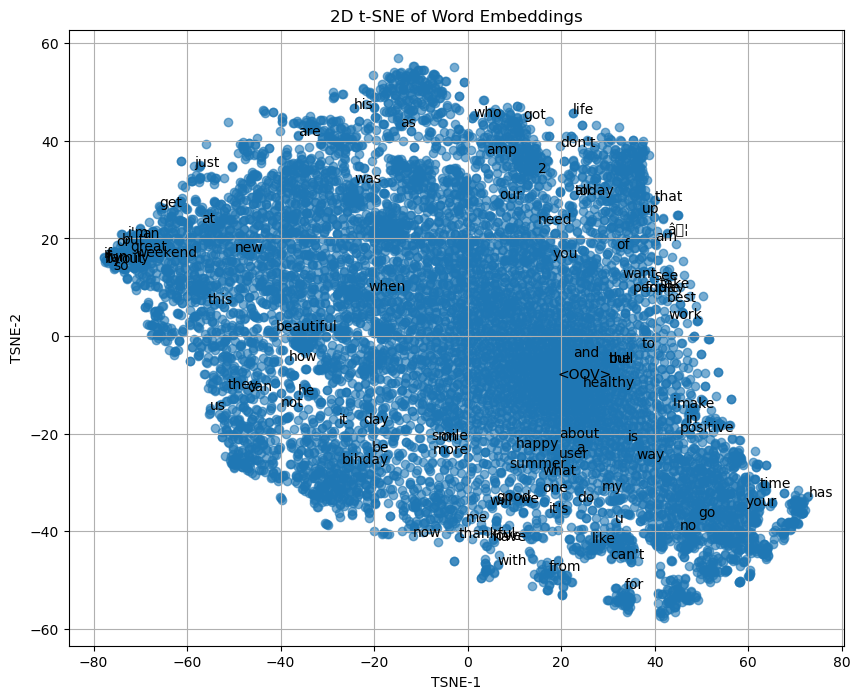

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.6)
index_word = tokenizer.index_word
for i in range(100):
    word = index_word.get(i + 1)
    if word:
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('2D t-SNE of Word Embeddings')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.grid(True)
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X, y)
print(f"Test Accuracy: {test_acc:.4f}")

999/999 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9979 - loss: 0.0258
Test Accuracy: 0.9906
